<a href="https://colab.research.google.com/github/Asma-Draouil/Feature_Asma/blob/main/Vectorisation_ref.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import re
from nltk.corpus import stopwords

import nltk

In [8]:
url="https://raw.githubusercontent.com/Asma-Draouil/Feature_Asma/refs/heads/main/ref.csv"
df = pd.read_csv(url)

In [10]:
data_cleaned = df.copy()

In [11]:
data_cleaned = data_cleaned.rename(columns={'job_name': 'métier'})


In [12]:
# Télécharger les ressources nécessaires pour NLTK
nltk.download('stopwords')


# Charger les stopwords en français
stop_words = set(stopwords.words('french'))

def nettoyer_colonne_avance(texte):
    if not isinstance(texte, str):  # Vérifie que la valeur est une chaîne
        return ''
    # Convertir en minuscules
    texte = texte.lower()
    # Remplacer les caractères spéciaux et ponctuations par des espaces
    texte = re.sub(r'[^\w\s]', ' ', texte)
    # Supprimer les espaces multiples
    texte = re.sub(r'\s+', ' ', texte).strip()
    # Supprimer les mots inutiles
    mots = texte.split()  # Divise le texte en mots avec split (pas de tokenisation)
    mots = [mot for mot in mots if mot not in stop_words]
    return ' '.join(mots)  # Recombine les mots filtrés

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Liste des colonnes textuelles
colonnes_textuelles = [
    "métier", "appellations", "identité", "compétences",
]

# Vérifiez quelles colonnes existent dans le DataFrame
colonnes_existe = [col for col in colonnes_textuelles if col in data_cleaned.columns]


for col in colonnes_existe:
    data_cleaned[col] = data_cleaned[col].fillna('').apply(nettoyer_colonne_avance)

In [14]:
data_cleaned.head()

,métier,appellations,identité,compétences
0,conception développement produits assurances c...,chargé chargée produit assurances chef produit...,définition conçoit adapte nouveaux produits as...,compétences base savoir faire analyser données...
1,conseil clientèle assurances c1102,agent commercial agente commerciale assurances...,définition informe conseille particuliers entr...,compétences base savoir faire analyser besoins...
2,courtage assurances c1103,agent général agente générale assurances court...,définition accompagne clientèle particuliers p...,compétences base savoir faire mettre oeuvre ac...
3,direction exploitation assurances c1104,chargé chargée agence assurances chargé chargé...,définition organise planification activité ges...,compétences base savoir faire définir stratégi...
4,études actuarielles assurances c1105,actuaire confirmé sénior actuaire junior charg...,définition evalue court moyen long terme renta...,compétences base savoir faire proposer axes am...


In [15]:
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

# Appliquer la tokenisation à chaque cellule de toutes les colonnes
data_cleaned = data_cleaned.apply(lambda col: col.apply(word_tokenize))

# Vérifier les résultats
print(data_cleaned.head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                              métier  \
0  [conception, développement, produits, assuranc...   
1            [conseil, clientèle, assurances, c1102]   
2                      [courtage, assurances, c1103]   
3       [direction, exploitation, assurances, c1104]   
4          [études, actuarielles, assurances, c1105]   

                                        appellations  \
0  [chargé, chargée, produit, assurances, chef, p...   
1  [agent, commercial, agente, commerciale, assur...   
2  [agent, général, agente, générale, assurances,...   
3  [chargé, chargée, agence, assurances, chargé, ...   
4  [actuaire, confirmé, sénior, actuaire, junior,...   

                                            identité  \
0  [définition, conçoit, adapte, nouveaux, produi...   
1  [définition, informe, conseille, particuliers,...   
2  [définition, accompagne, clientèle, particulie...   
3  [définition, organise, planification, activité...   
4  [définition, evalue, court, moyen, long, te

In [16]:
from nltk.stem.snowball import FrenchStemmer

# Initialiser le stemmer pour le français
stemmer = FrenchStemmer()

# Exemple d'application du stemming sur des données tokenisées
data_cleaned = data_cleaned.applymap(
    lambda x: [stemmer.stem(word) for word in x] if isinstance(x, list) else x
)

# Vérifier les résultats
print(data_cleaned.head())

<ipython-input-16-3478052cfef9>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_cleaned = data_cleaned.applymap(


                                       métier  \
0  [concept, développ, produit, assur, c1101]   
1           [conseil, clientel, assur, c1102]   
2                     [courtag, assur, c1103]   
3             [direct, exploit, assur, c1104]   
4             [étud, actuariel, assur, c1105]   

                                        appellations  \
0  [charg, charg, produit, assur, chef, produit, ...   
1  [agent, commercial, agent, commercial, assur, ...   
2  [agent, général, agent, général, assur, courti...   
3  [charg, charg, agenc, assur, charg, charg, bur...   
4  [actuair, confirm, sénior, actuair, junior, ch...   

                                            identité  \
0  [définit, conçoit, adapt, nouveau, produit, as...   
1  [définit, inform, conseil, particuli, entrepri...   
2  [définit, accompagn, clientel, particuli, prof...   
3  [définit, organis, planif, activ, gestion, adm...   
4  [définit, evalu, court, moyen, long, term, ren...   

                               

In [17]:
#Vectorisation
#TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer


# Dictionnaire pour stocker les résultats vectorisés
vecteurs = {}

# Vectorisation des colonnes
tfidf_vectorizer = TfidfVectorizer()

for col in data_cleaned:
    # Appliquer TF-IDF à chaque colonne
    vecteurs[col] = tfidf_vectorizer.fit_transform(data_cleaned[col].astype(str))
    print(f"Colonne '{col}' vectorisée avec {len(tfidf_vectorizer.get_feature_names_out())} termes.")

# Combiner tous les vecteurs dans une seule matrice
from scipy.sparse import hstack

vecteurs_combines = hstack(list(vecteurs.values()))

# Afficher la dimension de la matrice finale
print(f"Dimensions de la matrice combinée : {vecteurs_combines.shape}")

Colonne 'métier' vectorisée avec 171 termes.
Colonne 'appellations' vectorisée avec 585 termes.
Colonne 'identité' vectorisée avec 609 termes.
Colonne 'compétences' vectorisée avec 843 termes.
Dimensions de la matrice combinée : (70, 2208)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


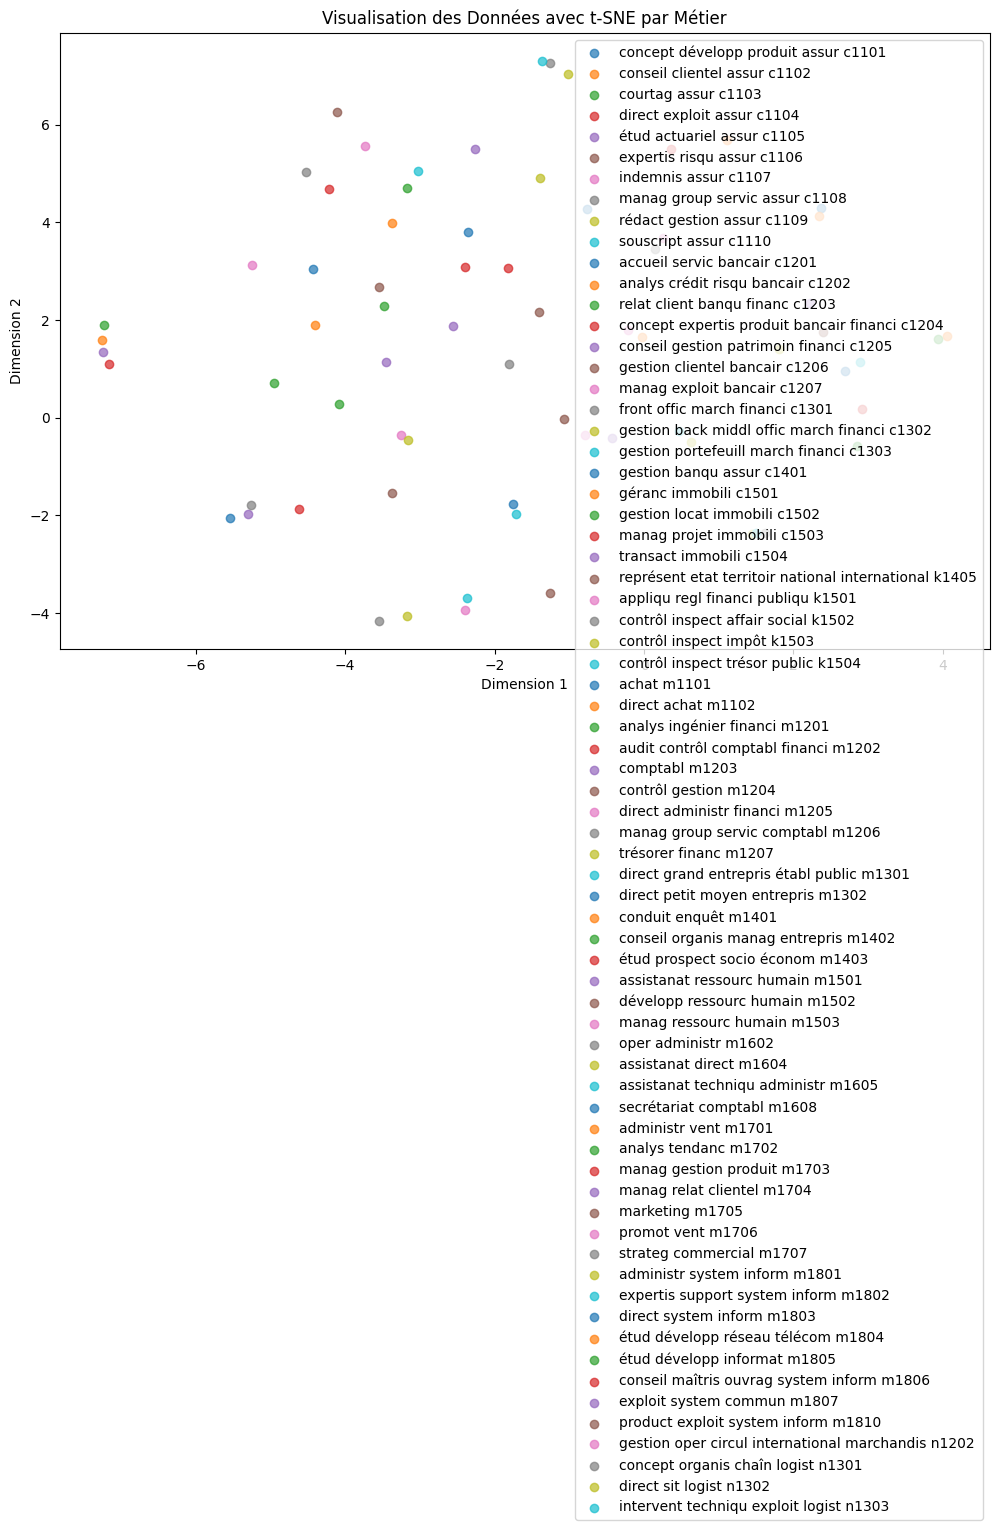

In [24]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assurer que la colonne 'Métier' contient uniquement des chaînes
data_cleaned['métier'] = data_cleaned['métier'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

# Appliquer t-SNE sur la matrice combinée
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
data_tsne = tsne.fit_transform(vecteurs_combines.toarray())

# Créer un DataFrame pour visualisation
df_tsne = pd.DataFrame(data_tsne, columns=['Dimension 1', 'Dimension 2'])

# Ajouter la colonne 'Métier' pour la visualisation
df_tsne['métier'] = data_cleaned['métier']

# Visualisation avec matplotlib
plt.figure(figsize=(12, 8))
for métier in df_tsne['métier'].unique():
    subset = df_tsne[df_tsne['métier'] == métier]
    plt.scatter(subset['Dimension 1'], subset['Dimension 2'], label=métier, alpha=0.7)

plt.title("Visualisation des Données avec t-SNE par Métier")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()


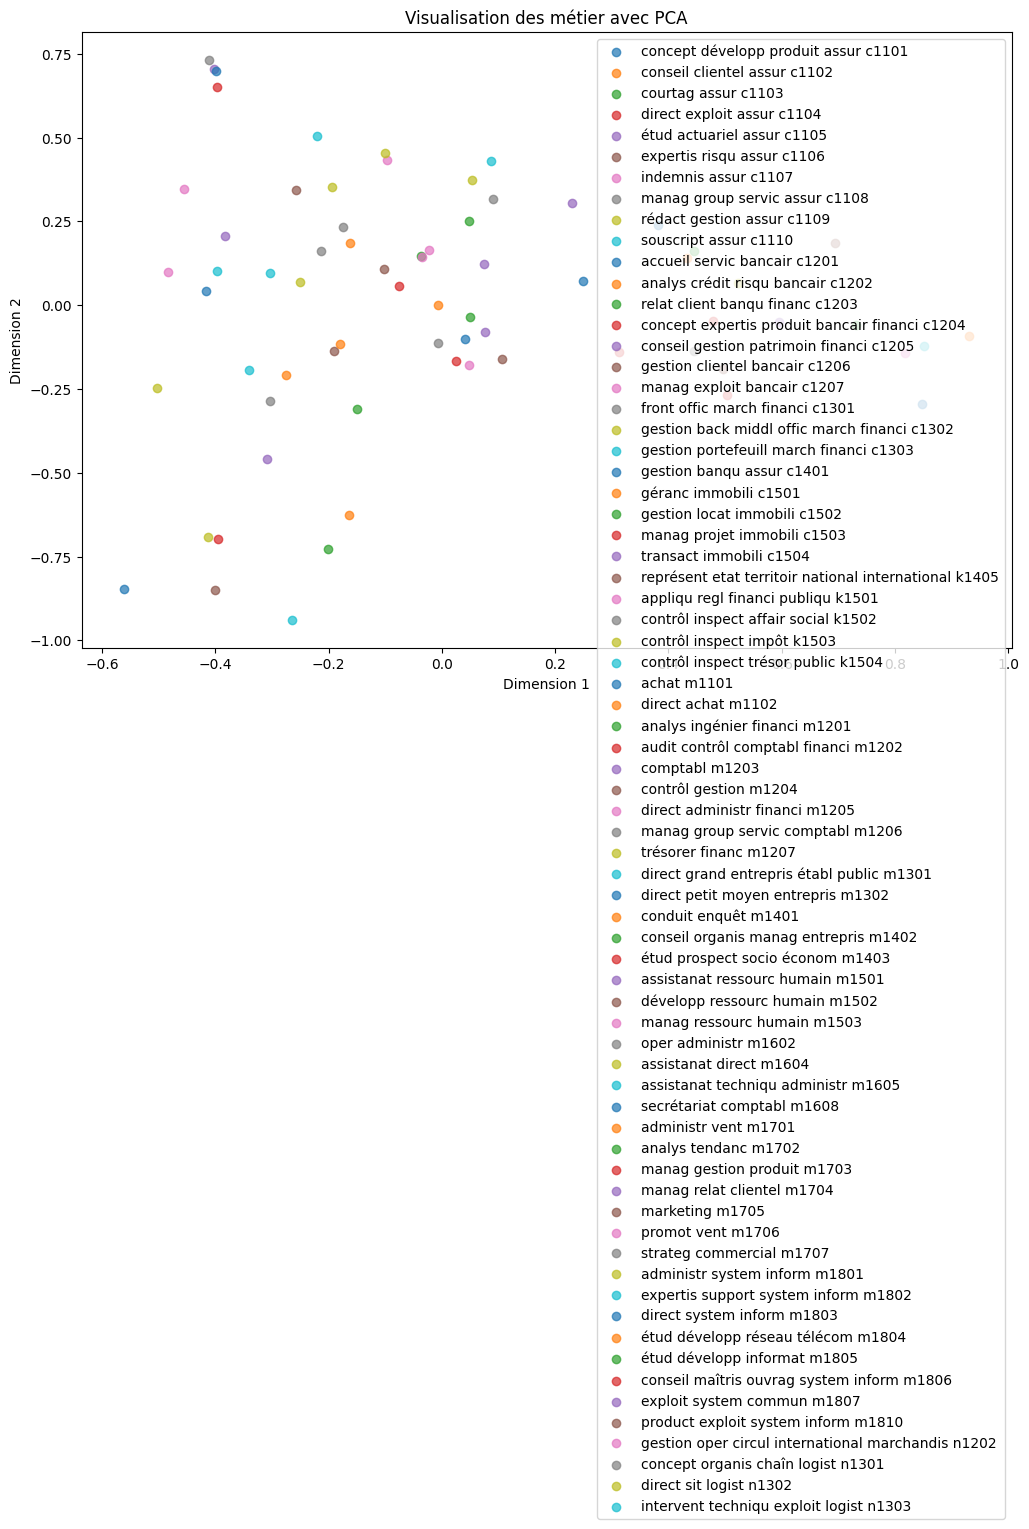

In [25]:
# Visualisation avec PCA (Réduction dimensionnelle )
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
data_pca = pca.fit_transform(vecteurs_combines.toarray())

# Créer un DataFrame pour visualisation
df_pca = pd.DataFrame(data_pca, columns=['Dimension 1', 'Dimension 2'])
df_pca['métier'] = data_cleaned['métier']

# Visualisation
plt.figure(figsize=(12, 8))
for métier in df_pca['métier'].unique():
    subset = df_pca[df_pca['métier'] == métier]
    plt.scatter(subset['Dimension 1'], subset['Dimension 2'], label=métier, alpha=0.7)

plt.title("Visualisation des métier avec PCA")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()

In [26]:
#vector avec SPACY
# Installer spaCy
!pip install spacy

# Télécharger le modèle français
!python -m spacy download fr_core_news_md
import spacy
import numpy as np

# Charger le modèle spaCy pré-entraîné pour le français
nlp = spacy.load("fr_core_news_md")  # Modèle français

# Remplacer les valeurs manquantes par une chaîne vide et convertir toutes les colonnes en chaînes
data_cleaned = data_cleaned.fillna('').astype(str)

# Sélectionner toutes les colonnes à vectoriser
colonnes_a_vectoriser = data_cleaned.columns

# Fonction pour vectoriser un texte avec spaCy (en utilisant la moyenne des vecteurs de mots)
def vectorize_text_spacy(text, nlp, dimension=300):
    doc = nlp(text)  # Appliquer le modèle spaCy au texte
    # Moyenne des vecteurs de mots pour obtenir un seul vecteur
    vectors = [token.vector for token in doc if token.has_vector]  # Inclure uniquement les tokens qui ont un vecteur
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(dimension)  # Retourner un vecteur nul si aucun vecteur n'est trouvé

# Vectoriser chaque colonne et convertir en matrice 2D
vecteurs = {}
for col in colonnes_a_vectoriser:
    print(f"Vectorisation de la colonne : {col}")
    vecteurs[col] = np.array([vectorize_text_spacy(str(text), nlp) for text in data_cleaned[col]])

# Convertir chaque tableau 2D pour compatibilité avec hstack
matrices = [np.array(vecteurs[col]) for col in colonnes_a_vectoriser]

# Combiner les matrices horizontalement
vecteurs_combines_spacy = np.hstack(matrices)

# Afficher les dimensions de la matrice finale
print(f"Dimensions de la matrice combinée : {vecteurs_combines_spacy.shape}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 MB 19.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Vectorisation de la colonne : métier
Vectorisation de la colonne : appellations
Vectorisation de la colonne : identité
Vectorisation de la colonne : compétences
Dimensions de la matrice combinée : (70, 1200)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


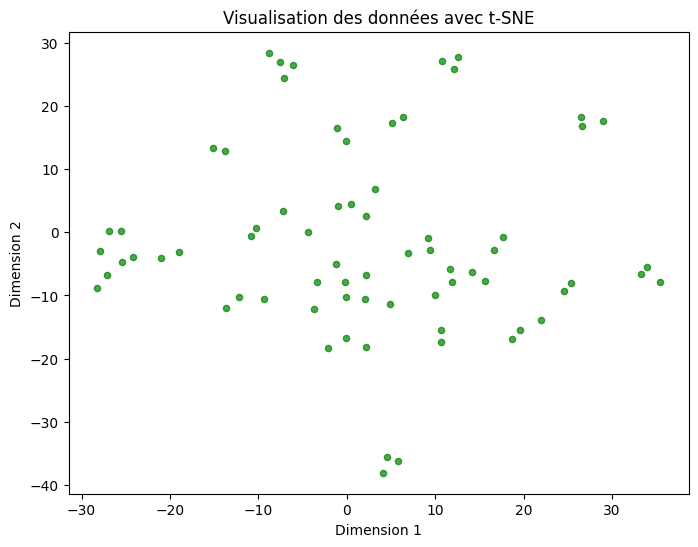

In [27]:
# Visualisation avec t-SNE
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Réduction de dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=4, n_iter=1000)
vecteurs_tsne = tsne.fit_transform(vecteurs_combines_spacy)

# Visualisation avec t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(vecteurs_tsne[:, 0], vecteurs_tsne[:, 1], alpha=0.7, s=20, c='green')
plt.title("Visualisation des données avec t-SNE")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

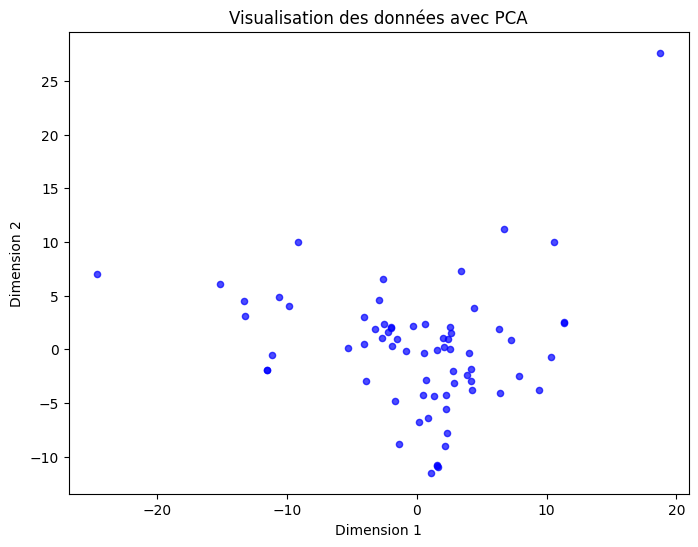

In [28]:

# Visualisation avec PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Réduction de dimensions avec PCA
pca = PCA(n_components=2)  # Réduire à 2 dimensions
vecteurs_pca = pca.fit_transform(vecteurs_combines_spacy)

# Visualisation avec PCA
plt.figure(figsize=(8, 6))
plt.scatter(vecteurs_pca[:, 0], vecteurs_pca[:, 1], alpha=0.7, s=20, c='blue')
plt.title("Visualisation des données avec PCA")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()